In [ ]:
# Define the documents
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"
doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties.He claimed President Putin is a friend who had nothing to do with the election"
doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"
documents = [doc_trump, doc_election, doc_putin]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

documents = [doc_trump, doc_election] # Assuming doc_election and doc_trump are defined

# count_vect was likely used as a variable before, causing the IndentationError. Renamed to my_count_vect to prevent potential variable name conflict with the library function.
my_count_vect = CountVectorizer(stop_words="english")
sparse_matrix = my_count_vect.fit_transform(documents)

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=my_count_vect.get_feature_names_out(),
                  index=['doc_trump','doc_election']) # Removed 'doc_putin' from index as it's not in documents
df

,claimed,election,friend,friends,interference,lost,mr,outcome,parties,political,president,putin,republican,says,support,trump,winning,witchhunt
doc_trump,0,1,0,2,0,1,1,0,0,1,2,1,1,0,1,2,1,0
doc_election,1,2,1,0,1,0,0,1,1,2,2,2,0,2,0,1,0,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity # Import cosine_similarity

documents = [doc_trump, doc_election] # Assuming doc_election and doc_trump are defined

# count_vect was likely used as a variable before, causing the IndentationError. Renamed to my_count_vect to prevent potential variable name conflict with the library function.
my_count_vect = CountVectorizer(stop_words="english")
sparse_matrix = my_count_vect.fit_transform(documents)

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=my_count_vect.get_feature_names_out(),
                  index=['doc_trump','doc_election']) # Removed 'doc_putin' from index as it's not in documents


print(cosine_similarity(df,df)) # Call cosine_similarity directly

[[1.         0.51639778]
 [0.51639778 1.        ]]


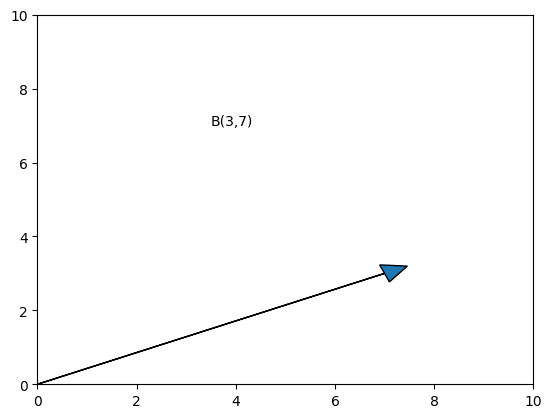

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([7,3])
B = np.array([3,7])
ax = plt.axes()
ax.arrow(0.0,0.0,A[0],A[1],head_width=0.5,head_length=0.5)
plt.annotate(f"B({B[0]},{B[1]})",xy=(B[0],B[1]),xytext=(B[0]+0.5,B[1]))
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()
plt.close()

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
responses = [
    "You can return an item within 7 days of purchase.",
    "Our rerturn policy allows you to return items that are unopened and in their original condition.",
    "we offer free shipping on order over $50.",
    "To track your order.You can visit the 'Order Tracking' page and enter your order number.",
    "Our customer support team from 9am to 6pm, Monday through Friday."

]

In [ ]:
user_input = "How I track my order?"

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english") # Change 'English' to 'english'
all_text = responses + [user_input]
tfidf_matrix = vectorizer.fit_transform(all_text)

In [ ]:
user_vector = tfidf_matrix[-1]
response_vectors = tfidf_matrix[:-1]
cosine_similarities = cosine_similarity(user_vector, response_vectors)


In [ ]:
most_similar_idx = np.argmax(cosine_similarities)
print(f"User Query: {user_input}") # Changed User_input to user_input
print(f"Most Similar Response: {responses[most_similar_idx]}")

User Query: How I track my order?
Most Similar Response: To track your order.You can visit the 'Order Tracking' page and enter your order number.
